## Monterey Bay Kelp PCA

This example uses data from the supplementary material of:

Graham, M. H. (2003), Confronting multicollinearity in ecological multiple regression. _Ecology_, 84: 2809–2815. doi:10.1890/02-3114 
http://onlinelibrary.wiley.com/doi/10.1890/02-3114/abstract

The details of observational methods can be found in an earlier paper:

Graham, M. H. (1997) Factors determining the upper limit of giant kelp, _Macrocystis pyrifera_ Agardh, along the Monterey Peninsula, central California, USA, _J. Exp. Mar. Bio. Ecol._, 218, 127-149.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd

In [2]:
df = pd.read_csv('data/week07_Graham2003_Kelp/Originaldata.txt',delimiter=' ')
df.head()

,Response,OD,BD,LTD,W
0,3.241,2.0176,4.87,-0.59,-4.1
1,3.032,1.9553,4.78,-0.75,4.7
2,3.100,1.8131,3.14,-0.38,-4.9
3,3.156,2.5751,3.28,-0.16,-3.2
4,3.110,2.2589,3.28,0.01,5.6


Variables:

* Response - shallow (upper) distributional limit of kelp Macrocystis pyrifera [m]
* OD - wave orbital displacement [m]
* BD - wave breaking depth [m]
* LTD - minimum daily tidal height [m]
* W - wind velocity [m/s], positive onshore

Text(0, 0.5, 'depth [m]')

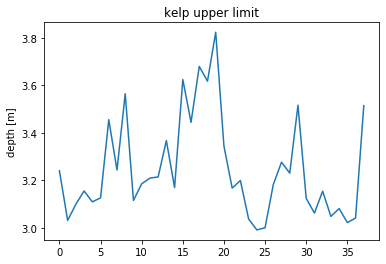

In [3]:
plt.plot(df.index,df['Response'])
plt.title('kelp upper limit')
plt.ylabel('depth [m]')

#### Exercise

* Become familiar with data set, make scatter plots to see which variables have strongest correlation with response (kelp).

### Goal of analysis:

* Instead of correlating with one variable, we will use PCA to create an "index" of common environmental variability.

### Step 1: data matrix

Put our environmental variables into matrix form. This matrix (which excludes the response variable) has four columns.

In [4]:
data = df.values
np.shape(data)
env_data = data[:,1:]
print(env_data)

[[ 2.0176e+00  4.8700e+00 -5.9000e-01 -4.1000e+00]
 [ 1.9553e+00  4.7800e+00 -7.5000e-01  4.7000e+00]
 [ 1.8131e+00  3.1400e+00 -3.8000e-01 -4.9000e+00]
 [ 2.5751e+00  3.2800e+00 -1.6000e-01 -3.2000e+00]
 [ 2.2589e+00  3.2800e+00  1.0000e-02  5.6000e+00]
 [ 2.5448e+00  4.8700e+00 -1.9000e-01  4.1000e+00]
 [ 2.6291e+00  6.2700e+00 -1.4000e-01  5.3000e+00]
 [ 3.1553e+00  7.1600e+00 -4.3000e-01  2.3500e+01]
 [ 3.4030e+00  7.2400e+00 -3.4000e-01  1.3300e+01]
 [ 2.8150e+00  7.1600e+00 -3.3000e-01 -4.5000e+00]
 [ 1.9012e+00  4.7800e+00 -2.7000e-01 -4.7000e+00]
 [ 2.1463e+00  3.2800e+00 -2.0000e-01 -4.6000e+00]
 [ 2.5851e+00  3.4700e+00 -4.8000e-01 -4.0000e+00]
 [ 2.0830e+00  3.1400e+00 -2.6000e-01 -2.0000e+00]
 [ 1.7192e+00  4.7800e+00 -9.0000e-02 -2.8000e+00]
 [ 3.5471e+00  4.7800e+00 -1.7000e-01  3.5000e+00]
 [ 3.6720e+00  7.1600e+00 -3.4000e-01  1.3200e+01]
 [ 4.7259e+00  8.6500e+00 -5.4000e-01  2.0600e+01]
 [ 3.6039e+00  8.6500e+00 -7.0000e-01  1.4100e+01]
 [ 4.1214e+00  6.1600e+00 -4.60

__Exercise:__ Standardize data by transforming to z-scores

Subtract the mean and divide by the standard deviation of each column, giving a standardized variable with zero mean and standard deviation of 1. We do this in order to weight all variables equally. 

In [5]:
env_data_norm = (env_data - np.mean(env_data,axis=0))/np.std(env_data,axis=0,ddof=1)
print('mean: ',np.mean(env_data_norm,axis=0))
print('std. dev:', np.std(env_data_norm,axis=0,ddof=1))

mean:  [-5.20051838e-16  1.34395419e-16  1.98671489e-16  4.09029535e-17]
std. dev: [1. 1. 1. 1.]


## Step 2: correlation (or covariance) matrix
Next create the correlation matrix. We can also think of this as the covariance matrix of the standardized variables. If we don't standardize the variables, we end up weighting them differently simply based on how big the numbers are.

In [6]:
R = np.cov(env_data_norm,rowvar=False) # or could do np.corrcoef

In [7]:
print('correlation matrix R:')
print(R)

correlation matrix R:
[[ 1.          0.72834006 -0.28090584  0.68143749]
 [ 0.72834006  1.         -0.33859444  0.63372787]
 [-0.28090584 -0.33859444  1.         -0.3565089 ]
 [ 0.68143749  0.63372787 -0.3565089   1.        ]]


Note that this matrix is symmetric. 

## Step 3: covariance (or correlation) matrix

$ RV = V\Lambda $

The eigenvalues are in the matrix $\Lambda$ 

The eigenvectors are in the matrix $V$

In [8]:
val,vec = linalg.eig(R)

In [9]:
print(val)

[2.56536859+0.j 0.80551944+0.j 0.25828926+0.j 0.37082272+0.j]


By default the eignevalues are complex valued - real and imaginary part. Python uses `j` to denote the square root of negative one. In this case there is no imaginary part, and we just want the real part.

In [10]:
val = np.real(val)
print('eigenvalues: ',val)

eigenvalues:  [2.56536859 0.80551944 0.25828926 0.37082272]


In [11]:
print('eigenvalue matrix:')
print(np.diag(val))

eigenvalue matrix:
[[2.56536859 0.         0.         0.        ]
 [0.         0.80551944 0.         0.        ]
 [0.         0.         0.25828926 0.        ]
 [0.         0.         0.         0.37082272]]


The eigenvalues are also referred to as the variance explained by each principal component. In this case we are working with the correlation matrix, which means that we have standardized each variable to have a standard deviation of one (and there a variance of one, since the variance is the standard deviation).

In [12]:
np.sum(val)

3.999999999999997

__Exercise:__ Find the percentage of total variance explained by each component

In [13]:
pctvar=val/np.sum(val)*100
print ('percent of total variance')
print (pctvar)
print('eigenvectors:')
print(vec)

percent of total variance
[64.13421463 20.13798595  6.45723148  9.27056795]
eigenvectors:
[[-0.54799191 -0.29010584  0.76825404 -0.15915149]
 [-0.545347   -0.17936923 -0.57706165 -0.58088137]
 [ 0.33846526 -0.93353908 -0.09720099  0.06706729]
 [-0.53641661 -0.11031802 -0.25949479  0.7954556 ]]


In [14]:
print('PC1: ', vec[:,0])

PC1:  [-0.54799191 -0.545347    0.33846526 -0.53641661]


### Factor loading matrix

Eigenvectors times square root of eigenvectors

$A = V\sqrt{\Lambda}$

The columns of this new A matrix are called the factor loadings for each principal component. We can think of new axes for the data in a space defined by waves, wind and tides. The factor loadings define those axes - both the orientation (eigenvector) and the spread of the data across each axis (square root of eigenvalue - which describes the standard deviation).

In [15]:
A = np.dot(vec,np.diag(val)**0.5) #np.matmul works too
print(A)

[[-0.87770594 -0.26037212  0.39044335 -0.09691564]
 [-0.87346965 -0.1609852  -0.29327523 -0.35372896]
 [ 0.54211195 -0.83785818 -0.04939965  0.04084077]
 [-0.85916604 -0.09901124 -0.13188087  0.4843944 ]]


In [16]:
print('PC1 loading:')
print(A[:,0])
print('OD','BD','LTD','W')

PC1 loading:
[-0.87770594 -0.87346965  0.54211195 -0.85916604]
OD BD LTD W


A common way of visualizing the results of PCA is to plot the factor loadings for the first two principal components (the first two columns of the A matrix). If variables are clumped together, it means that they covary (similar direction with respect to origin), with similar magnitudes (similar distance from origin). 

This plot can be thought of as viewing the original data axes (which exist in four-dimensional space) from a perspective that is perpendicular to the plane defined by the first two PC's. It is the _projection_ of the original axes onto the 2D plane defined by the first two PCs.

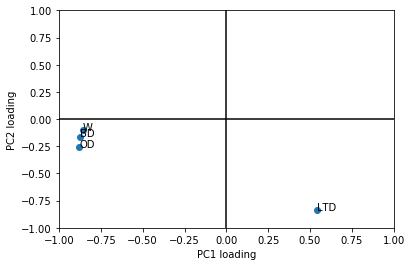

In [17]:
plt.figure()
plt.plot(A[:,0],A[:,1],'o')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['OD','BD','LTD','W']
for i,txt in enumerate(variables):
    plt.text(A[i,0],A[i,1],txt)

In this case, the two wave variables and wind all covary. Remember, that these variables are standardized so that each one has the same standard deviation.

### Principal component score
This is the projection of each data vector onto new component axes. It is the new variables created from the original data, based on rotating axes. 

In [18]:
S = np.matmul(env_data_norm,vec)

In [19]:
print(S)

[[ 1.91278267e-01  1.75273583e+00 -2.46948300e-01 -6.62789410e-01]
 [-6.22340919e-01  2.50238735e+00 -4.69006554e-01  1.80910633e-01]
 [ 1.33268779e+00  9.19047979e-01  5.59006276e-02 -3.36154166e-02]
 [ 1.08056344e+00 -5.41613865e-01  5.53224530e-01  1.89191065e-02]
 [ 1.03524778e+00 -1.43816224e+00 -1.18589075e-01  1.00570204e+00]
 [ 5.45220251e-02 -6.39890470e-01 -2.29372743e-01  1.86955466e-01]
 [-4.33631190e-01 -1.09496287e+00 -6.88539041e-01 -1.69564103e-01]
 [-2.82315846e+00 -1.05037123e-01 -9.15867813e-01  1.09664761e+00]
 [-2.17154607e+00 -5.34307501e-01 -4.32706908e-01  5.68102939e-02]
 [-5.56858339e-01 -1.27244176e-01 -3.97595465e-01 -1.53902275e+00]
 [ 9.45167873e-01  1.36947189e-01 -4.81566862e-01 -5.47811246e-01]
 [ 1.38555547e+00 -1.60518805e-01  2.15225403e-01 -4.93166517e-02]
 [ 4.58705545e-01  1.12056868e+00  6.98369555e-01 -2.46274578e-01]
 [ 1.18744346e+00  1.55486808e-01  1.52532393e-01  2.42526080e-01]
 [ 1.28382551e+00 -7.66108434e-01 -8.11988427e-01 -2.58650517e

Looking at the correlation matrix between the principal component scores, we see that each score is completely uncorrelated with the other scores (correlations of ~1e-16, close to zero within numerical roundoff error).

In [20]:
print(np.corrcoef(S,rowvar=False))

[[ 1.00000000e+00  2.64451594e-16 -8.07393033e-16  3.90121179e-16]
 [ 2.64451594e-16  1.00000000e+00 -6.39777672e-17 -2.75053788e-17]
 [-8.07393033e-16 -6.39777672e-17  1.00000000e+00 -3.07723425e-16]
 [ 3.90121179e-16 -2.75053788e-17 -3.07723425e-16  1.00000000e+00]]


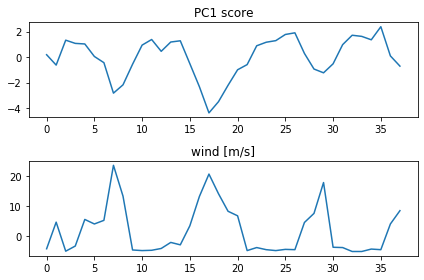

In [24]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(S[:,0])
plt.title('PC1 score')
plt.subplot(2,1,2)
plt.plot(env_data[:,3])
plt.title('wind [m/s]')
plt.tight_layout()

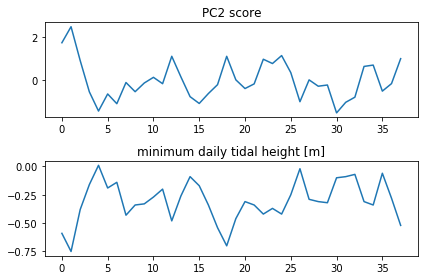

In [23]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(S[:,1])
plt.title('PC2 score')
plt.subplot(2,1,2)
plt.plot(env_data[:,2])
plt.title('minimum daily tidal height [m]')
plt.tight_layout()

The scatter plot of the first two principal component scores shows the data on the same plane onto which we plotted the factor loadings above.

Think about this geometrically as taking the original data, defined in 4D space, and looking at those data projected onto a 2D screen. We choose the orientation of the screen so that we can see as much of the variance data, or as much of the spread in the data, as possible.

Here, we can visually see that the scores are uncorrelated. There is no evidence of a linear relationship between them.

Text(0.5, 0, 'PC 2')

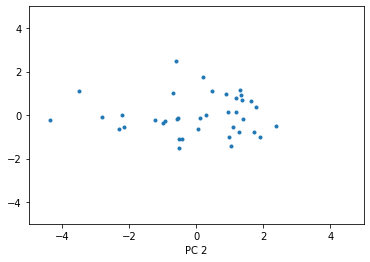

In [25]:
plt.figure()
plt.plot(S[:,0],S[:,1],'.')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('PC 1')
plt.xlabel('PC 2')

Text(0.5, 0, 'PC 4')

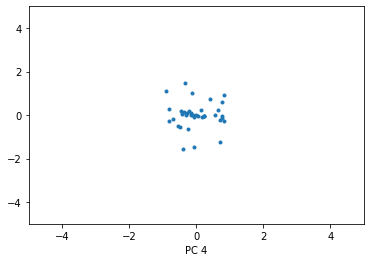

In [26]:
plt.figure()
plt.plot(S[:,2],S[:,3],'.')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('PC 3')
plt.xlabel('PC 4')

Compared with the first two PCs, looking at the data projected onto the third and fourth PC's shows much less scatter. These PC's do not account for much of the variance, just small-variance noise in the data. 

Most of the variance in the data is now spread out along the PC1 axis